### student performance 


In [26]:
!pip install scikit-learn


In [27]:
import sklearn


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [29]:


import numpy as np

import pandas as pd

import matplotlib.pyplot as pit

import seaborn as sns

#Modelling
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor


from sklearn.neighbors import KNeighborsRegressor



from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor


from sklearn.linear_model import LinearRegression, Ridge, Lasso


from sklearn.linear_model import LinearRegression, Ridge, Lasso


from sklearn.model_selection import RandomizedSearchCV


import warnings



In [30]:

import pandas as pd
df = pd.read_csv("C:/Users/kajal/OneDrive/Music/Desktop/e-comm/StudentsPerformance.csv")




In [31]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [32]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
x = df.drop(columns=['math score'], axis=1)

In [34]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [35]:
Y = df['math score']
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [36]:
Y = df['math score']
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [37]:
print("Categories in 'gender' variable: ",end=" ")

print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end=" ")
print(df['race/ethnicity'].unique())


print("Categories in'parental level of education' variable:", end=" ")
print(df['parental level of education'].unique())

print("Categories in lunch variable: ",end=" ")

print(df ['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [38]:
# Assuming x is your DataFrame
num_cols = x.select_dtypes(exclude="object").columns
cat_cols = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Define the transformers
num_trans = StandardScaler()
oh_tran = OneHotEncoder()

# Create the column transformer
preprocessor = ColumnTransformer(
    [
        ("OneHot Encoder", oh_tran, cat_cols), 
        ("StandardScaler", num_trans, num_cols),
    ]
)

# Fit and transform the data
x_transformed = preprocessor.fit_transform(x)

# Print the shape of the transformed data
print("Shape of transformed data (dense matrix):", x_transformed.shape)



Shape of transformed data (dense matrix): (1000, 19)


In [39]:
x= preprocessor.fit_transform(x)

In [40]:
x.shape

(1000, 19)

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'C:/Users/kajal/OneDrive/Music/Desktop/e-comm/StudentsPerformance.csv'
data = pd.read_csv(file_path)

# Define features and target (for illustration, using 'math score' as the target)
X = data.drop(columns=['math score'])
y = data['math score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f'Training features shape: {X_train.shape}')
print(f'Test features shape: {X_test.shape}')
print(f'Training target shape: {y_train.shape}')
print(f'Test target shape: {y_test.shape}')


Training features shape: (800, 7)
Test features shape: (200, 7)
Training target shape: (800,)
Test target shape: (200,)


In [44]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Evaluation function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Models with dynamic n_neighbors
models = {
    "LR": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNN": KNeighborsRegressor(n_neighbors=min(5, len(X_train))),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor()
}

model_list = []
r2_list = []

# Suppress only the UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

for name, model in models.items():
    if name == "KNN" and len(X_train) < 5:
        print(f"Skipping {name} because the dataset is too small.")
        continue

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    model_list.append(name)
    r2_list.append(model_test_r2)

    print(f"Model: {name}")
    print("Model performance for Training set")
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    if model_train_r2 is not None:
        print(f"- R2 Score: {model_train_r2:.4f}")
    else:
        print("- R2 Score: Not applicable (less than 2 samples)")

    print("\nModel performance for Test set")
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    if model_test_r2 is not None:
        print(f"- R2 Score: {model_test_r2:.4f}")
    else:
        print("- R2 Score: Not applicable (less than 2 samples)")
    print("-" * 50)


ValueError: could not convert string to float: 'female'

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Load the dataset
file_path = 'C:/Users/kajal/OneDrive/Music/Desktop/e-comm/StudentsPerformance.csv'
data = pd.read_csv(file_path)

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Define features and target (using 'math score' as the target)
X = data_encoded.drop(columns=['math score'])
y = data_encoded['math score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f'Training features shape: {X_train.shape}')
print(f'Test features shape: {X_test.shape}')
print(f'Training target shape: {y_train.shape}')
print(f'Test target shape: {y_test.shape}')

# Evaluation function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Models with dynamic n_neighbors
models = {
    "LR": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNN": KNeighborsRegressor(n_neighbors=min(5, len(X_train))),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor()
}

model_list = []
r2_list = []

# Suppress only the UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

for name, model in models.items():
    if name == "KNN" and len(X_train) < 5:
        print(f"Skipping {name} because the dataset is too small.")
        continue

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    model_list.append(name)
    r2_list.append(model_test_r2)

    print(f"Model: {name}")
    print("Model performance for Training set")
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    if model_train_r2 is not None:
        print(f"- R2 Score: {model_train_r2:.4f}")
    else:
        print("- R2 Score: Not applicable (less than 2 samples)")

    print("\nModel performance for Test set")
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    if model_test_r2 is not None:
        print(f"- R2 Score: {model_test_r2:.4f}")
    else:
        print("- R2 Score: Not applicable (less than 2 samples)")
    print("-" * 50)


Training features shape: (800, 14)
Test features shape: (200, 14)
Training target shape: (800,)
Test target shape: (200,)
Model: LR
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743

Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804
--------------------------------------------------
Model: Lasso
Model performance for Training set
- Root Mean Squared Error: 6.4755
- Mean Absolute Error: 5.1128
- R2 Score: 0.8140

Model performance for Test set
- Root Mean Squared Error: 6.3632
- Mean Absolute Error: 5.0170
- R2 Score: 0.8336
--------------------------------------------------
Model: Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2666
- R2 Score: 0.8743

Model performance for Test set
- Root Mean Squared Error: 5.3964
- Mean Absolute Error: 4.2142
- R2 Score: 0.8803
-----------------------------------------

In [49]:
# Create a DataFrame to display model names and their corresponding R2 scores
results_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2'])

# Sort the DataFrame by R2 scores in descending order
sorted_results = results_df.sort_values(by='R2', ascending=False)

# Display the sorted results
print(sorted_results)


  Model Name        R2
0         LR  0.880433
2      Ridge  0.880326
5         RF  0.850825
1      Lasso  0.833603
4         DT  0.715992
3        KNN  0.695976


In [53]:
Lin_model =LinearRegression(fit_intercept=True)

Lin_model= lin_model.fit(X_train, y_train) 
y_pred =lin_model.predict(X_test)

score=r2_score(y_test, y_pred)* 100

print(" Accuracy of the model is %.2f" %score)



 Accuracy of the model is 88.04


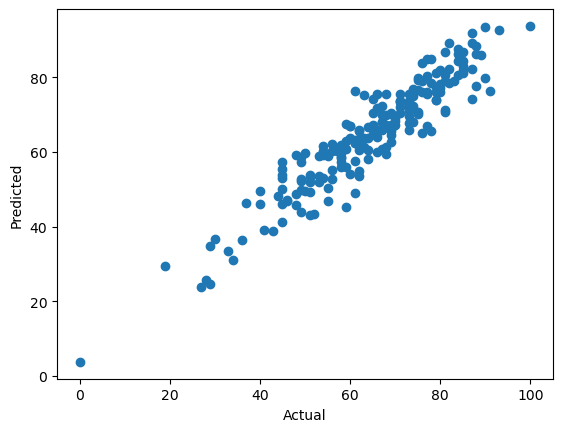

In [55]:

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');

plt.ylabel('Predicted');

<Axes: xlabel='math score'>

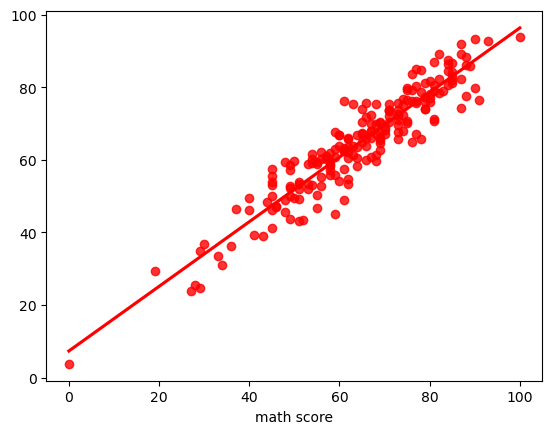

In [56]:
sns.regplot(x=y_test, y=y_pred, ci= None, color = 'red')

In [ ]:
pred_df= pd.dataFrame(({'Actual Value': y_test,'Predicted Value':y_pred,'Difference': y_test-y_pred})
                      pred